In [43]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree

In [44]:
#Importing data
Heart_disease = pd.read_excel('C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\heart_disease.xlsx',sheet_name='Heart_disease')
Heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [45]:
Heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [46]:
Heart_disease.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [47]:
Heart_disease.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [48]:
Heart_disease.duplicated().sum()

1

In [49]:
Heart_disease["num"].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [50]:
Heart_disease.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [51]:
data = Heart_disease.dropna(axis=0)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


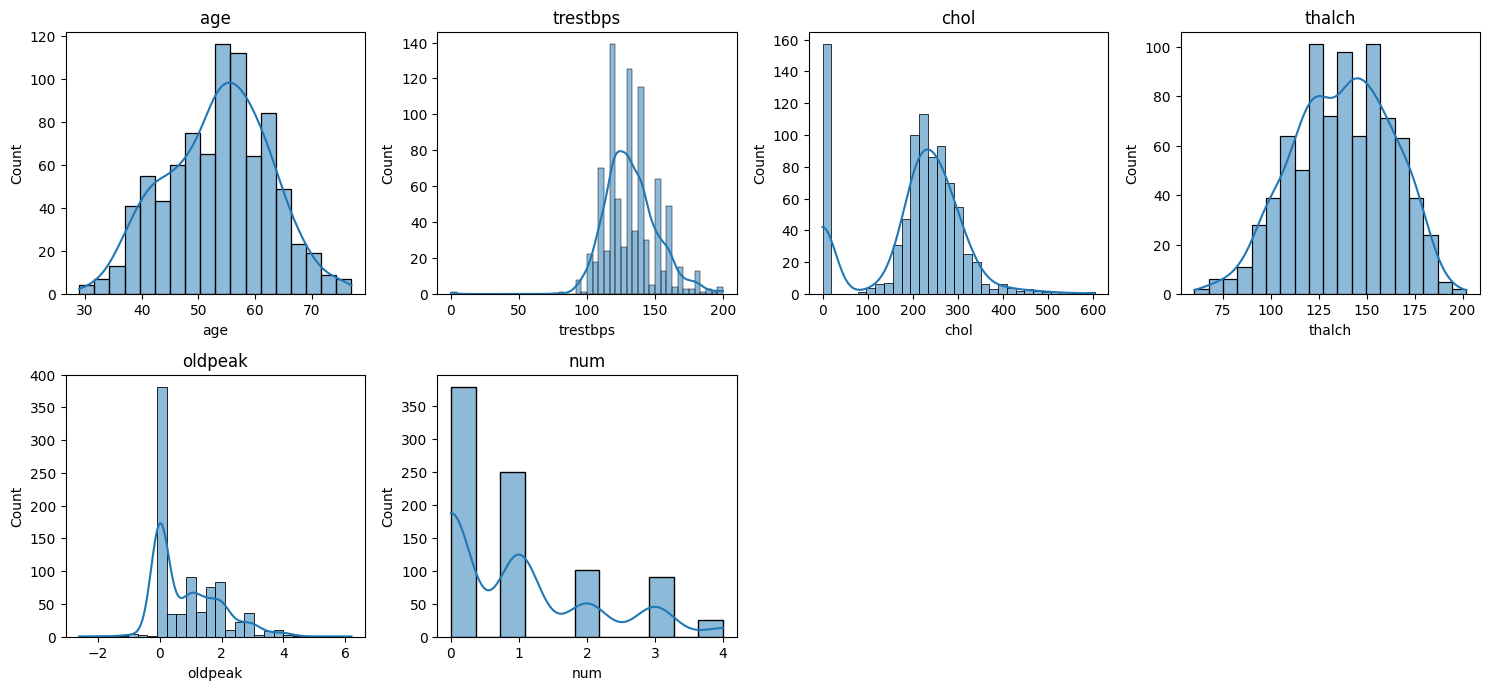

In [52]:
import matplotlib.pyplot as plt
import numpy as np


# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


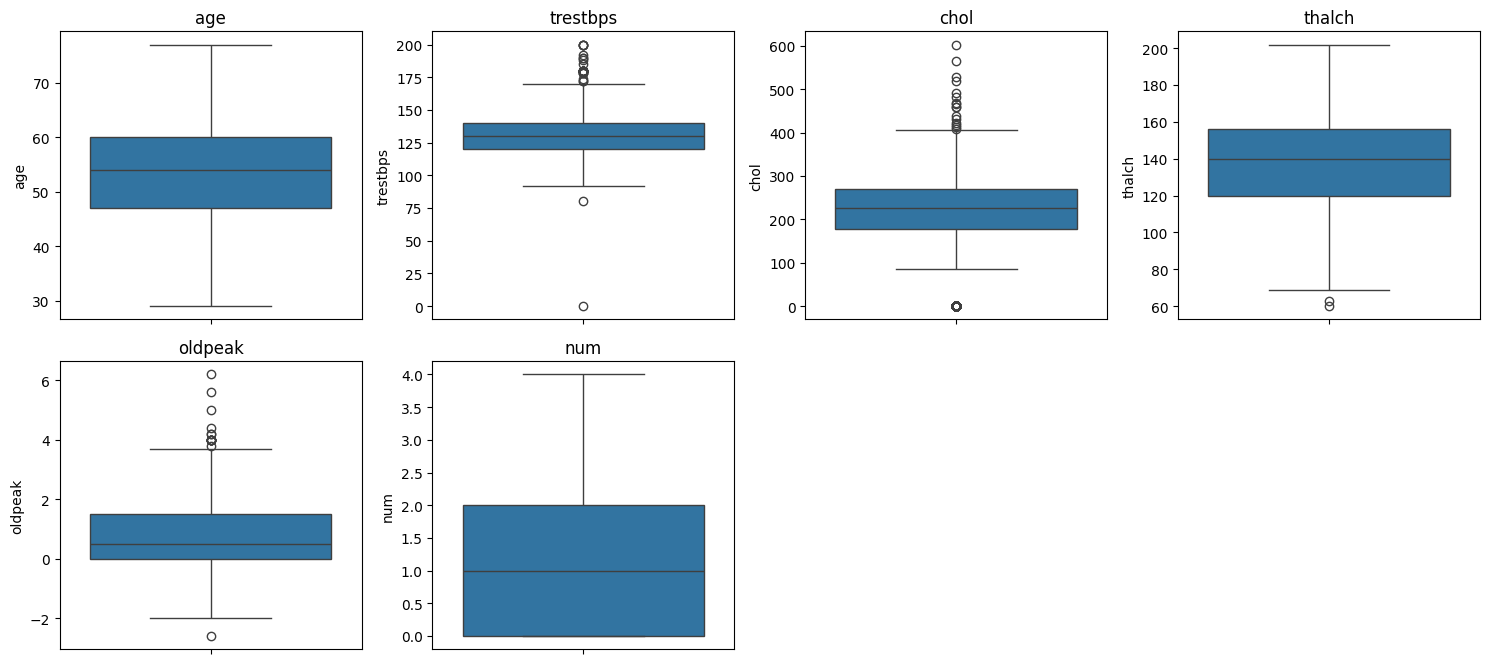

In [53]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)
    # Check if the column has enough data points to create a boxplot
    if len(data[col].dropna()) > 0:
        sns.boxplot(y=data[col])
        plt.title(col)
plt.tight_layout()
plt.show()

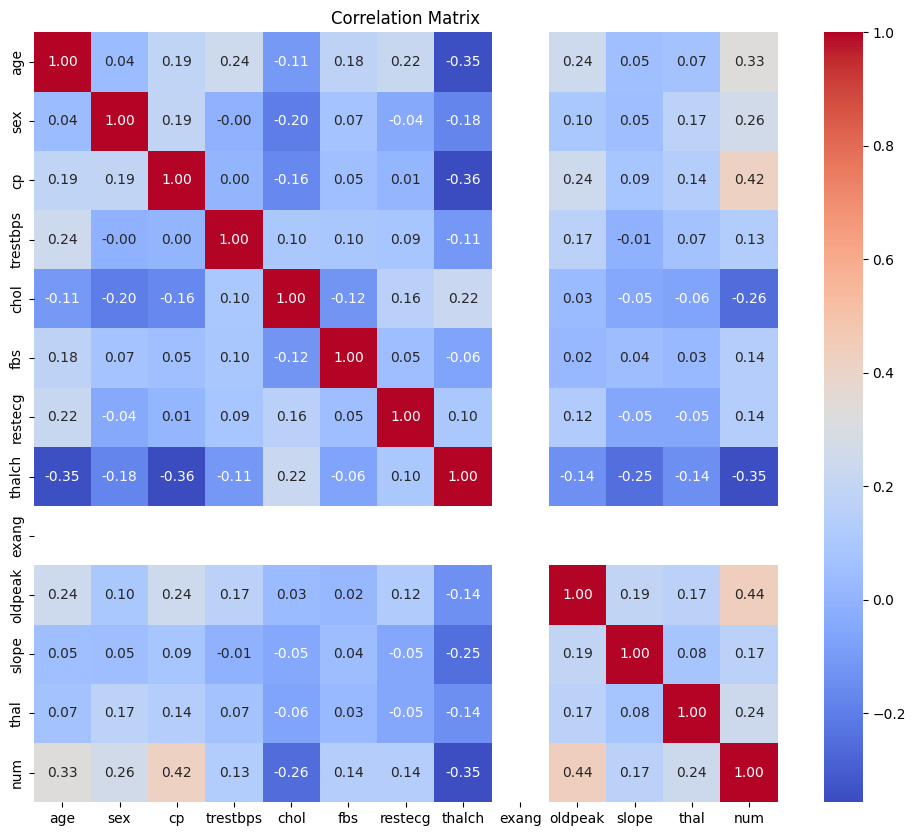

In [54]:
# Convert 'slope' column to numeric representation
slope_mapping = {'upsloping': 0, 'flat': 1, 'downsloping': 2}
data['slope'] = data['slope'].map(slope_mapping)

# Convert 'exang' column to numeric representation
data['exang'] = data['exang'].map({'TRUE': 1, 'FALSE': 0})

# Convert 'restecg' column to numeric representation
restecg_mapping = {'normal': 0, 'st-t wave abnormality': 1, 'lv hypertrophy': 2}
data['restecg'] = data['restecg'].map(restecg_mapping)

# Convert 'sex' column to numeric representation
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

# Convert 'cp' column to numeric representation
cp_mapping = {'typical angina': 0, 'atypical angina': 1, 'non-anginal pain': 2, 'asymptomatic': 3}
data['cp'] = data['cp'].map(cp_mapping)

# Convert 'thal' column to numeric representation # Added this line
thal_mapping = {'normal':0, 'fixed defect': 1, 'reversable defect': 2} # Added this line
data['thal'] = data['thal'].map(thal_mapping) # Added this line

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features using StandardScaler
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])



In [56]:
#Split the dataset into training and testing sets (e.g., using an 80-20 split

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop('num', axis=1)  # Assuming 'num' is the target variable
y = data['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test: Training and testing feature sets
# y_train, y_test: Training and testing target variable sets


In [57]:
#Implement a Decision Tree Classification model using a library like scikit-learn.

# Create a Decision Tree Classifier
dt_model = tree.DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Evaluate the model using appropriate metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.4764705882352941

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        80
           1       0.35      0.44      0.39        41
           2       0.16      0.29      0.21        14
           3       0.29      0.15      0.20        27
           4       0.00      0.00      0.00         8

    accuracy                           0.48       170
   macro avg       0.31      0.31      0.30       170
weighted avg       0.49      0.48      0.48       170


Confusion Matrix:
 [[55 18  4  2  1]
 [13 18  6  4  0]
 [ 5  2  4  2  1]
 [ 2 12  7  4  2]
 [ 0  2  4  2  0]]


In [58]:
# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
# Set average='weighted' for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC AUC if the target variable is binary
if len(y.unique()) == 2:
  roc_auc = roc_auc_score(y_test, y_pred)
  print(f"ROC AUC: {roc_auc:.4f}")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.4765
Precision: 0.4871
Recall: 0.4765
F1-Score: 0.4752


In [81]:
#Perform hyperparameter tuning to optimize the Decision Tree model. 
#Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree Classifier
dt_model = tree.DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train a new Decision Tree model with the best parameters
best_dt_model = tree.DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dt_model.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred = best_dt_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best Score: 0.5503485838779957
Accuracy: 0.5118
Precision: 0.4872
Recall: 0.5118
F1-Score: 0.4897


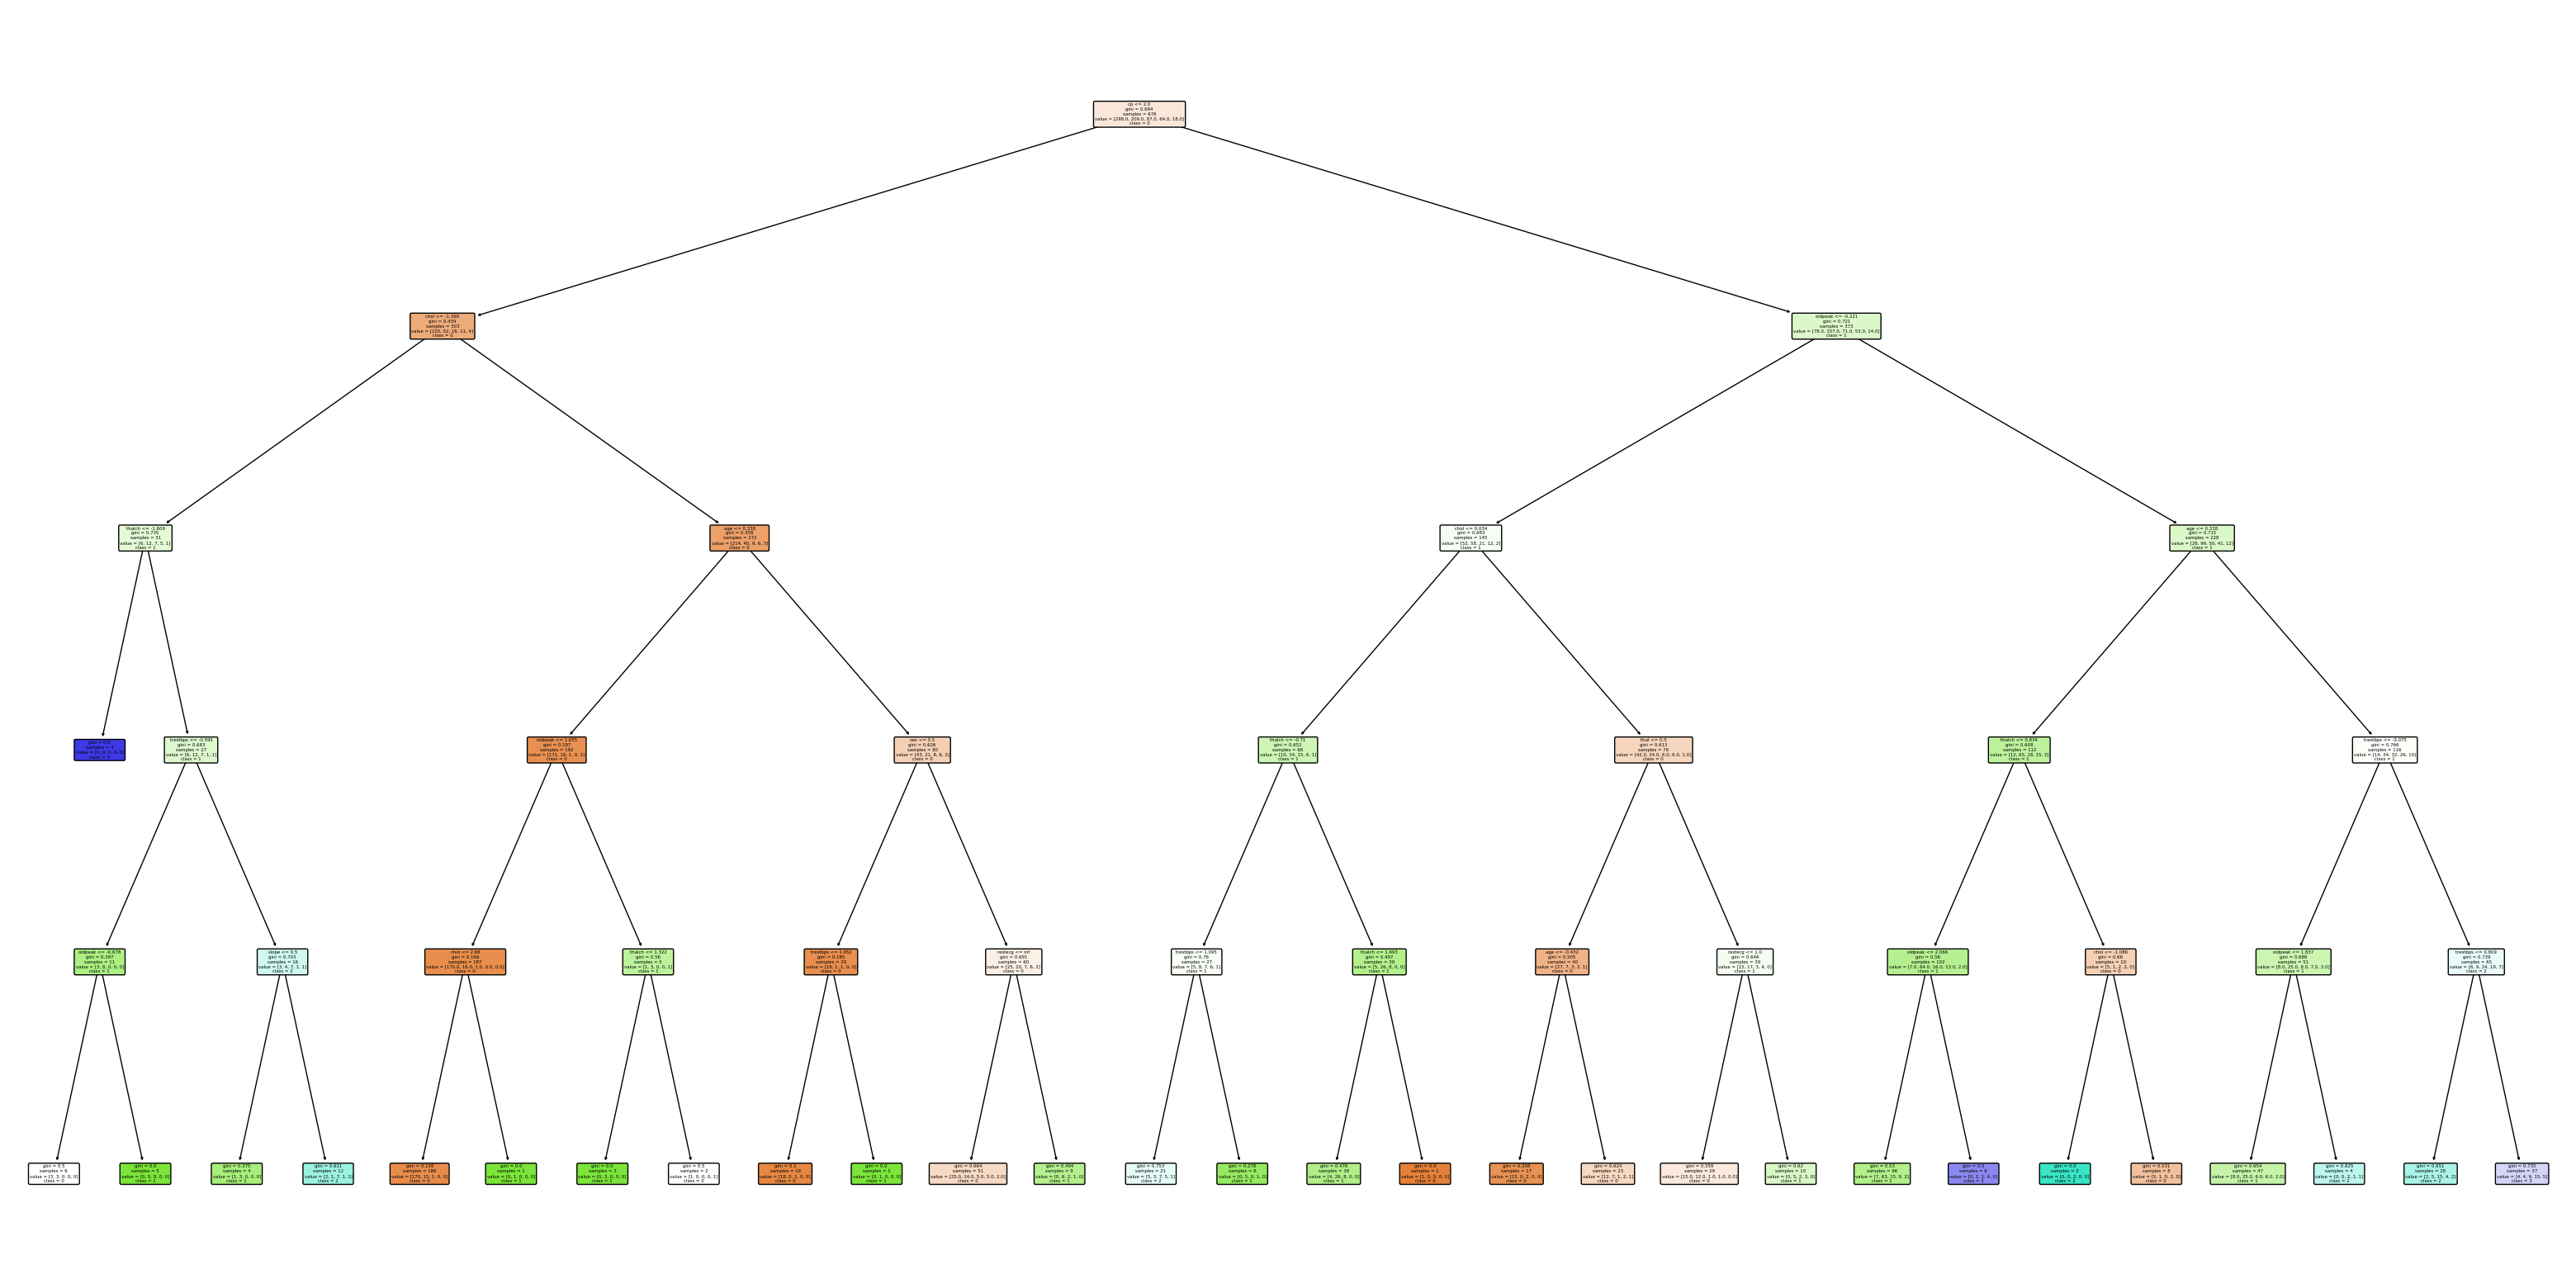

In [60]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(best_dt_model,
               feature_names=X.columns,
               class_names=[str(c) for c in best_dt_model.classes_], # Convert class names to strings
               filled=True,
               rounded=True)
plt.show()

In [61]:

# Interview Questions and Answers

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

# Answer:

# Decision tree models have several hyperparameters that can significantly influence their performance. Some common ones include:

# - max_depth: This hyperparameter limits the maximum depth of the tree.
#   - Increasing max_depth can lead to a more complex model that might overfit the training data.
#   - Decreasing max_depth can lead to a simpler model that might underfit the data.

# - min_samples_split: This hyperparameter sets the minimum number of samples required to split an internal node.
#   - A higher value can prevent overfitting by avoiding the creation of very small branches.

# - criterion: This hyperparameter determines the function used to measure the quality of a split.
#   - 'gini' and 'entropy' are common options. They both measure impurity, but 'gini' is often slightly faster to compute.

# - min_samples_leaf: This parameter sets the minimum number of samples required to be at a leaf node.
#   - A higher value can prevent the model from creating very specific leaf nodes that may overfit the training data.

# - max_features: This hyperparameter controls the number of features to consider when looking for the best split.
#   - Using fewer features can reduce overfitting.

# # By adjusting these hyperparameters, you can effectively control the complexity of the decision tree model and improve its generalization performance on unseen data.


# 2. What is the difference between Label encoding and One-hot encoding?

# Answer:

# Label encoding and one-hot encoding are techniques used to convert categorical features into numerical representations for machine learning models.

# - Label Encoding:
#   - It assigns a unique integer to each category in a feature.
#   - Example: if you have a 'color' feature with categories 'red', 'green', and 'blue', label encoding could assign them 0, 1, and 2 respectively.
#   - It is suitable for ordinal categorical variables, where the categories have a natural order.
#   - However, it can lead to incorrect assumptions about the relative magnitude of the categories for non-ordinal variables.

# - One-Hot Encoding:
#   - It creates a binary vector for each category in the feature.
#   - Each vector has a length equal to the number of categories.
#   - It assigns a 1 to the corresponding category and 0 to others.
#   - Example: for the same 'color' feature, one-hot encoding would create three new features:
#     - 'color_red' (1 if 'red', 0 otherwise)
#     - 'color_green' (1 if 'green', 0 otherwise)
#     - 'color_blue' (1 if 'blue', 0 otherwise)
#   - It is suitable for nominal categorical variables where the order doesn't matter.
#   - It can lead to a high number of new features, especially when dealing with a high cardinality of categories.

# In essence, label encoding preserves the number of features, but might impose an unintended order on them, while one-hot encoding avoids this issue but can significantly increase the dimensionality of your data.


